<a href="https://colab.research.google.com/github/KielDeMarco/AI_Portfolio/blob/main/Prophet_Rossman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from prophet import Prophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv

--2023-04-23 04:32:48--  https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38057952 (36M) [text/csv]
Saving to: ‘rossmann_train.csv’

rossmann_train.csv  100%[===================>]  36.29M  43.2MB/s    in 0.8s    

2023-04-23 04:32:49 (43.2 MB/s) - ‘rossmann_train.csv’ saved [38057952/38057952]



In [5]:
df = pd.read_csv('rossmann_train.csv', low_memory=False)

In [6]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


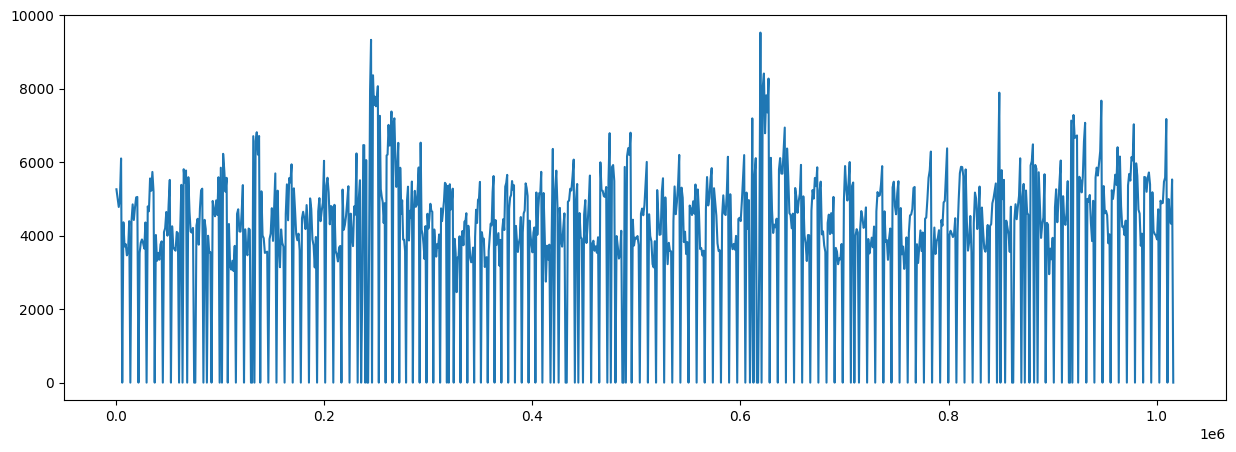

In [7]:
df[df['Store'] == 1]['Sales'].plot(figsize=(15, 5));

In [10]:
(df[df['Store'] == 1]['Sales'] == 0).sum()

161

In [11]:
store1 = df[df['Store'] == 1].copy()

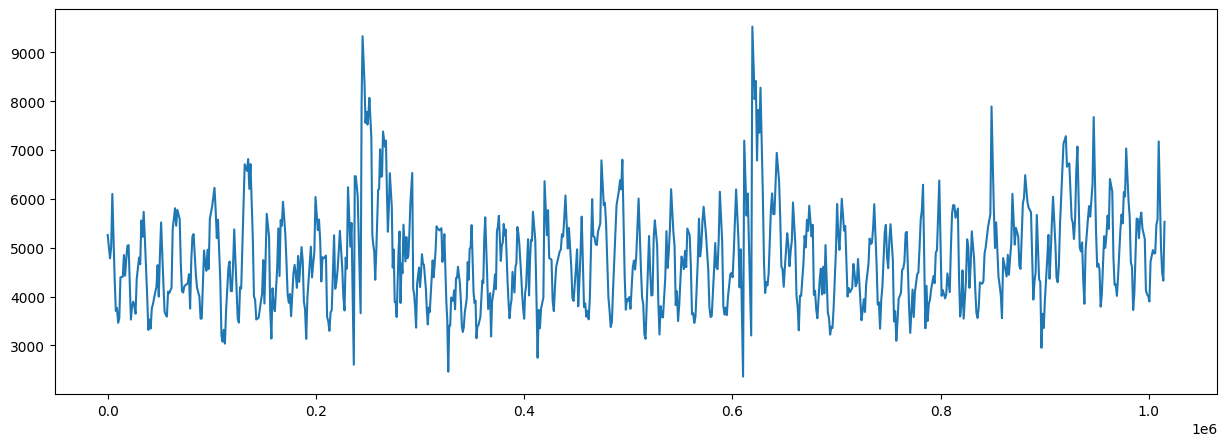

In [12]:
store1[store1['Open'] > 0]['Sales'].plot(figsize=(15, 5));

In [30]:
sales0 = store1[store1['Sales'] == 0].index
customers0 = store1[store1['Customers'] == 0].index
store_closed = store1[store1['Open'] == 0].index
print(np.all(sales0 == customers0))
print(np.all(store_closed == customers0))

True
True


In [14]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [31]:
store1['Date'] = pd.to_datetime(store1['Date'])

In [32]:
store1.set_index('Date', inplace = True)

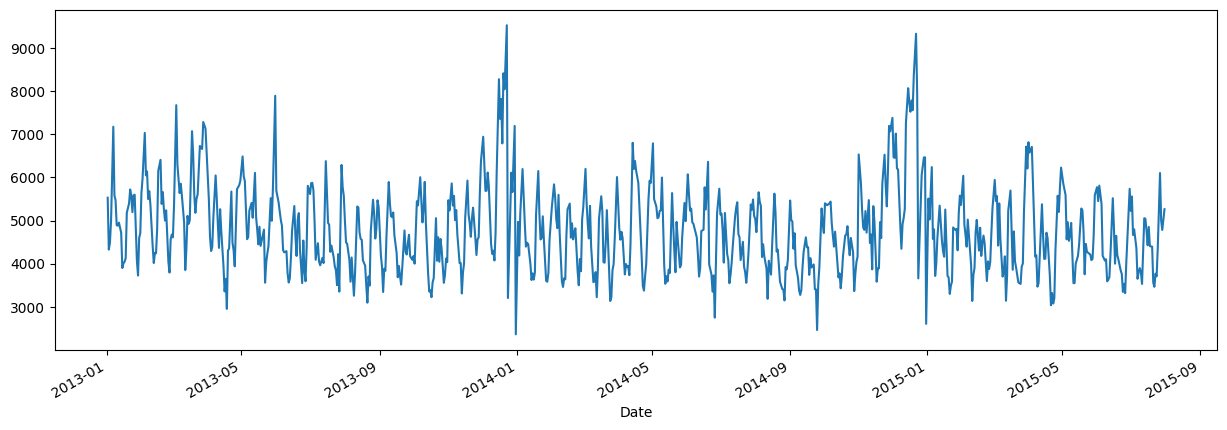

In [33]:
store1[store1['Customers'] > 0]['Sales'].plot(figsize=(15, 5));

In [34]:
df_p = store1[['Sales']].copy()

In [35]:
df_p['Date'] = df_p.index

In [36]:
df_p.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [37]:
df_p.tail()

,Sales,Date
Date,,
2013-01-05,4997,2013-01-05
2013-01-04,4486,2013-01-04
2013-01-03,4327,2013-01-03
2013-01-02,5530,2013-01-02
2013-01-01,0,2013-01-01


In [38]:
df_p.sort_index(inplace=True)

In [39]:
df_p.head(20)

,Sales,Date
Date,,
2013-01-01,0,2013-01-01
2013-01-02,5530,2013-01-02
2013-01-03,4327,2013-01-03
2013-01-04,4486,2013-01-04
2013-01-05,4997,2013-01-05
2013-01-06,0,2013-01-06
2013-01-07,7176,2013-01-07
2013-01-08,5580,2013-01-08
2013-01-09,5471,2013-01-09


In [40]:
df_p.tail()

,Sales,Date
Date,,
2015-07-27,6102,2015-07-27
2015-07-28,5011,2015-07-28
2015-07-29,4782,2015-07-29
2015-07-30,5020,2015-07-30
2015-07-31,5263,2015-07-31


In [41]:
df_p.columns = ['y', 'ds']

In [42]:
m = Prophet()

In [43]:
m.fit(df_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/0zdtwu1u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/tc2bjzgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48967', 'data', 'file=/tmp/tmpqiswbw42/0zdtwu1u.json', 'init=/tmp/tmpqiswbw42/tc2bjzgw.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_modeld3rqp6mx/prophet_model-20230423045710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:57:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:57:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [44]:
future = m.make_future_dataframe(periods=365)

In [45]:
future.head()

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [46]:
future.tail()

,ds
1302,2016-07-26
1303,2016-07-27
1304,2016-07-28
1305,2016-07-29
1306,2016-07-30


In [47]:
forecast = m.predict(future)

In [48]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1302,2016-07-26,3729.975538,3052.225063,6003.053147,3703.711535,3752.659511,714.252417,714.252417,714.252417,706.298036,706.298036,706.298036,7.954381,7.954381,7.954381,0.0,0.0,0.0,4444.227955
1303,2016-07-27,3729.749163,2777.248975,5598.295157,3703.361453,3752.524436,503.389652,503.389652,503.389652,510.531755,510.531755,510.531755,-7.142103,-7.142103,-7.142103,0.0,0.0,0.0,4233.138815
1304,2016-07-28,3729.522788,2396.579843,5194.516439,3703.011372,3752.369240,127.408591,127.408591,127.408591,151.282726,151.282726,151.282726,-23.874134,-23.874134,-23.874134,0.0,0.0,0.0,3856.931379
1305,2016-07-29,3729.296413,2858.935462,5709.890438,3702.674435,3752.214044,531.736576,531.736576,531.736576,573.644023,573.644023,573.644023,-41.907447,-41.907447,-41.907447,0.0,0.0,0.0,4261.032989
1306,2016-07-30,3729.070038,3335.460819,6221.661341,3702.349118,3752.072566,938.178763,938.178763,938.178763,999.065929,999.065929,999.065929,-60.887166,-60.887166,-60.887166,0.0,0.0,0.0,4667.248801


In [49]:
forecast = m.predict(future)

In [50]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1302,2016-07-26,3729.975538,3075.080089,5874.731946,3705.323966,3756.178408,714.252417,714.252417,714.252417,706.298036,706.298036,706.298036,7.954381,7.954381,7.954381,0.0,0.0,0.0,4444.227955
1303,2016-07-27,3729.749163,2800.157919,5697.906403,3704.928548,3756.034684,503.389652,503.389652,503.389652,510.531755,510.531755,510.531755,-7.142103,-7.142103,-7.142103,0.0,0.0,0.0,4233.138815
1304,2016-07-28,3729.522788,2429.286430,5288.795035,3704.650782,3755.888267,127.408591,127.408591,127.408591,151.282726,151.282726,151.282726,-23.874134,-23.874134,-23.874134,0.0,0.0,0.0,3856.931379
1305,2016-07-29,3729.296413,2760.301840,5714.172255,3704.388071,3755.739355,531.736576,531.736576,531.736576,573.644023,573.644023,573.644023,-41.907447,-41.907447,-41.907447,0.0,0.0,0.0,4261.032989
1306,2016-07-30,3729.070038,3191.538458,6129.930803,3704.125361,3755.590443,938.178763,938.178763,938.178763,999.065929,999.065929,999.065929,-60.887166,-60.887166,-60.887166,0.0,0.0,0.0,4667.248801


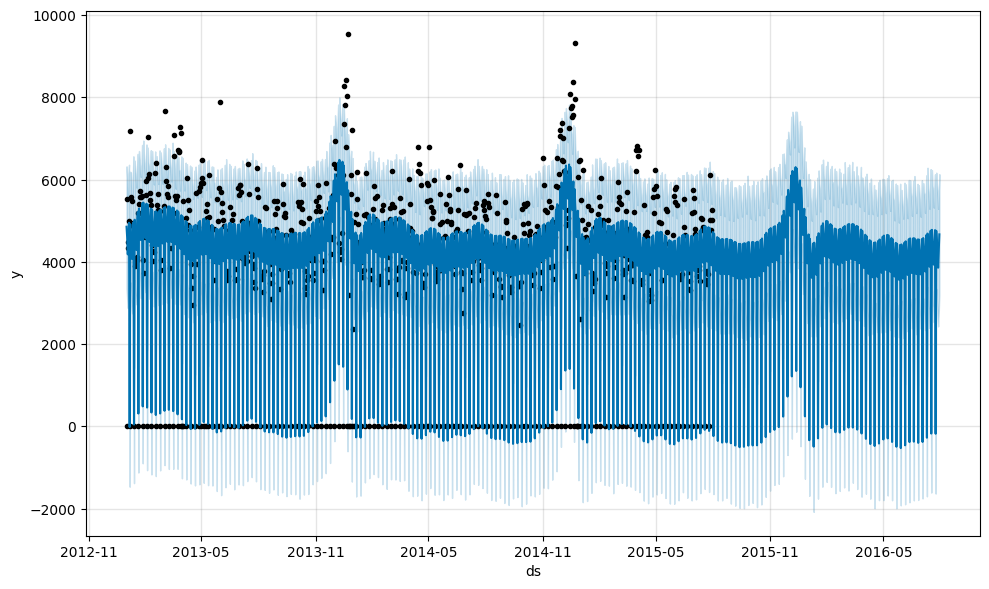

In [51]:
m.plot(forecast);

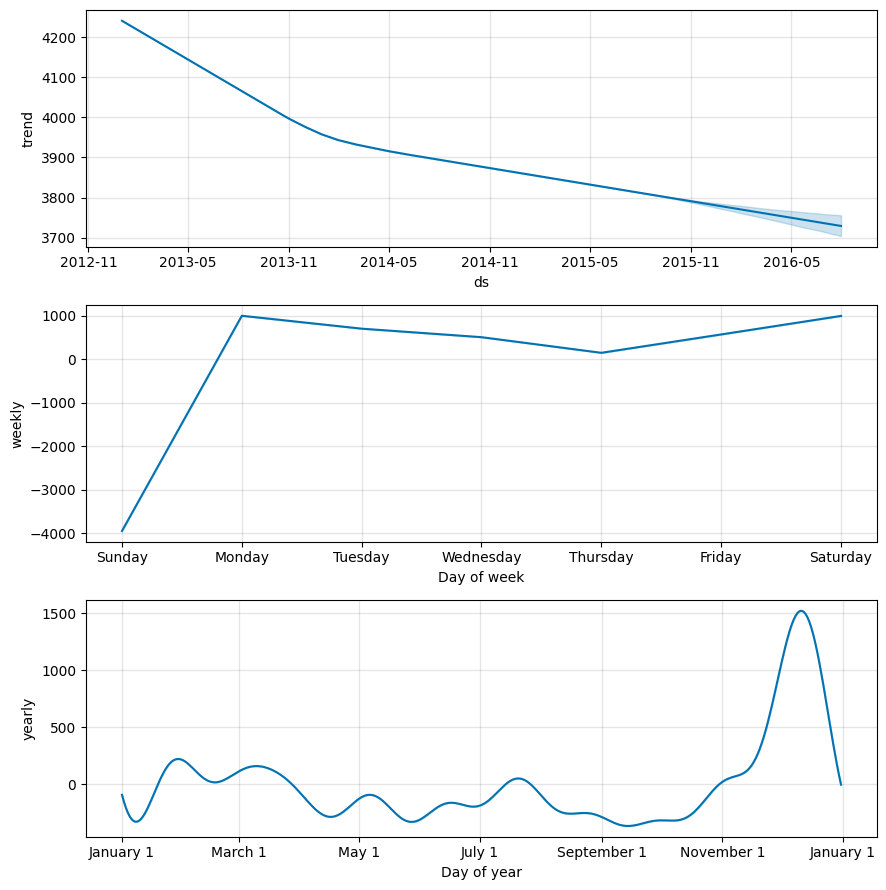

In [52]:
m.plot_components(forecast);

Model Open Days Only

In [55]:
df_p2 = store1[store1['Open'] > 0][['Sales']].copy()
df_p2['Date'] = df_p2.index

In [56]:
df_p2.head()

,Sales,Date
Date,,
2015-07-31,5263,2015-07-31
2015-07-30,5020,2015-07-30
2015-07-29,4782,2015-07-29
2015-07-28,5011,2015-07-28
2015-07-27,6102,2015-07-27


In [57]:
df_p2.columns = ['y', 'ds']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/ppy7fzja.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/es6glhks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49685', 'data', 'file=/tmp/tmpqiswbw42/ppy7fzja.json', 'init=/tmp/tmpqiswbw42/es6glhks.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_modelqwu3k_9e/prophet_model-20230423050910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:09:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


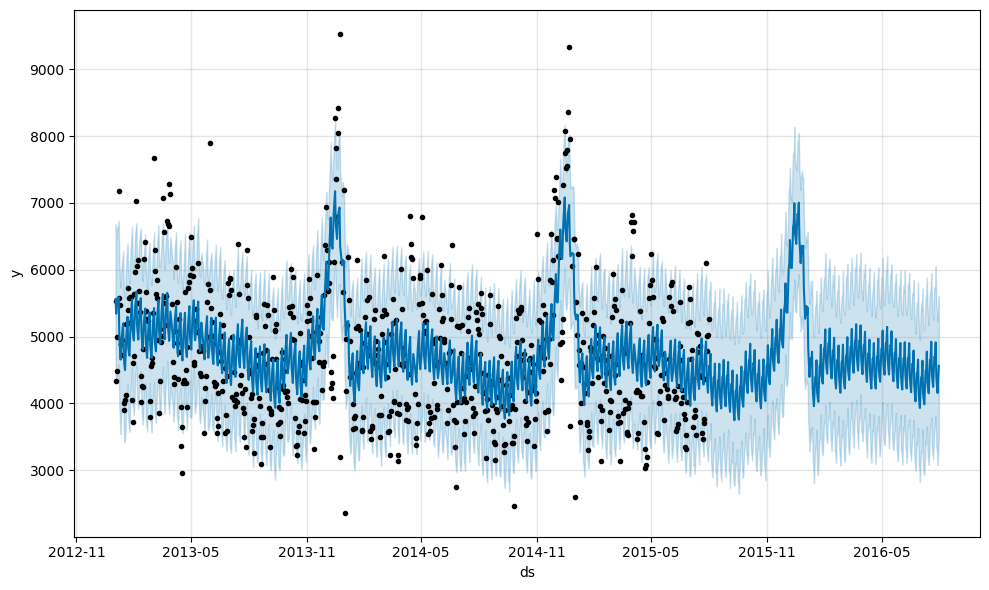

In [61]:
m2 = Prophet()
m2.fit(df_p2)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m2.predict(future2)
m2.plot(forecast2);

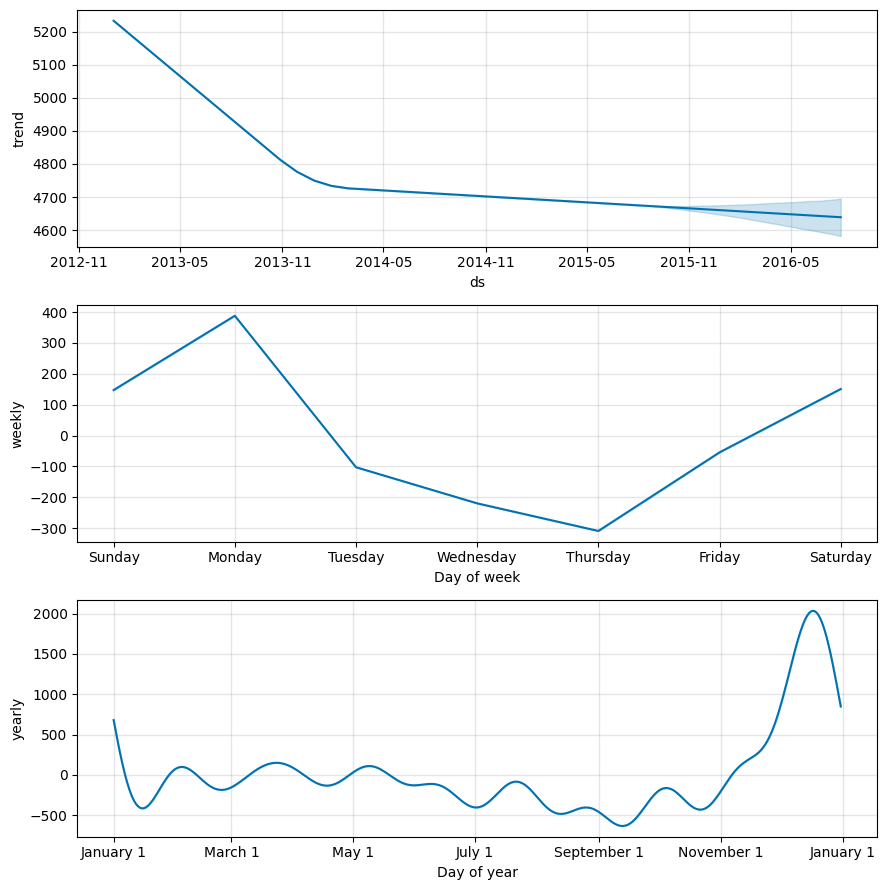

In [62]:
m2.plot_components(forecast2);

Add Holidays

In [63]:
m3 = Prophet()

In [65]:
m3.add_country_holidays(country_name='US')

In [66]:
m3.fit(df_p2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/n_a5r9cd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/a_t275vn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70595', 'data', 'file=/tmp/tmpqiswbw42/n_a5r9cd.json', 'init=/tmp/tmpqiswbw42/a_t275vn.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_modelb6cs9xbr/prophet_model-20230423051234.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [68]:
future3 = m3.make_future_dataframe(periods=365)

In [69]:
forecast3 = m3.predict(future3)

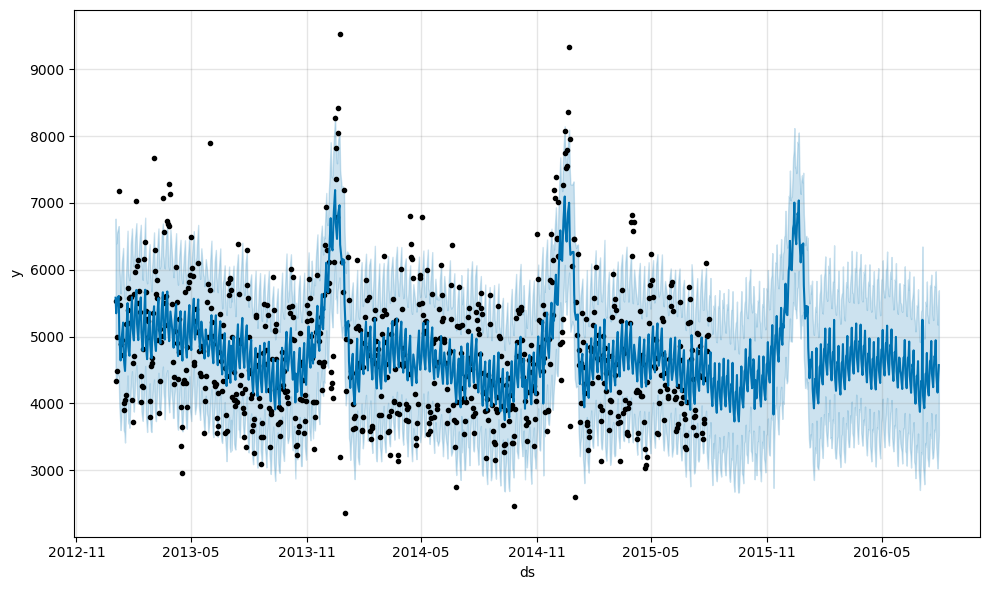

In [70]:
m3.plot(forecast3);

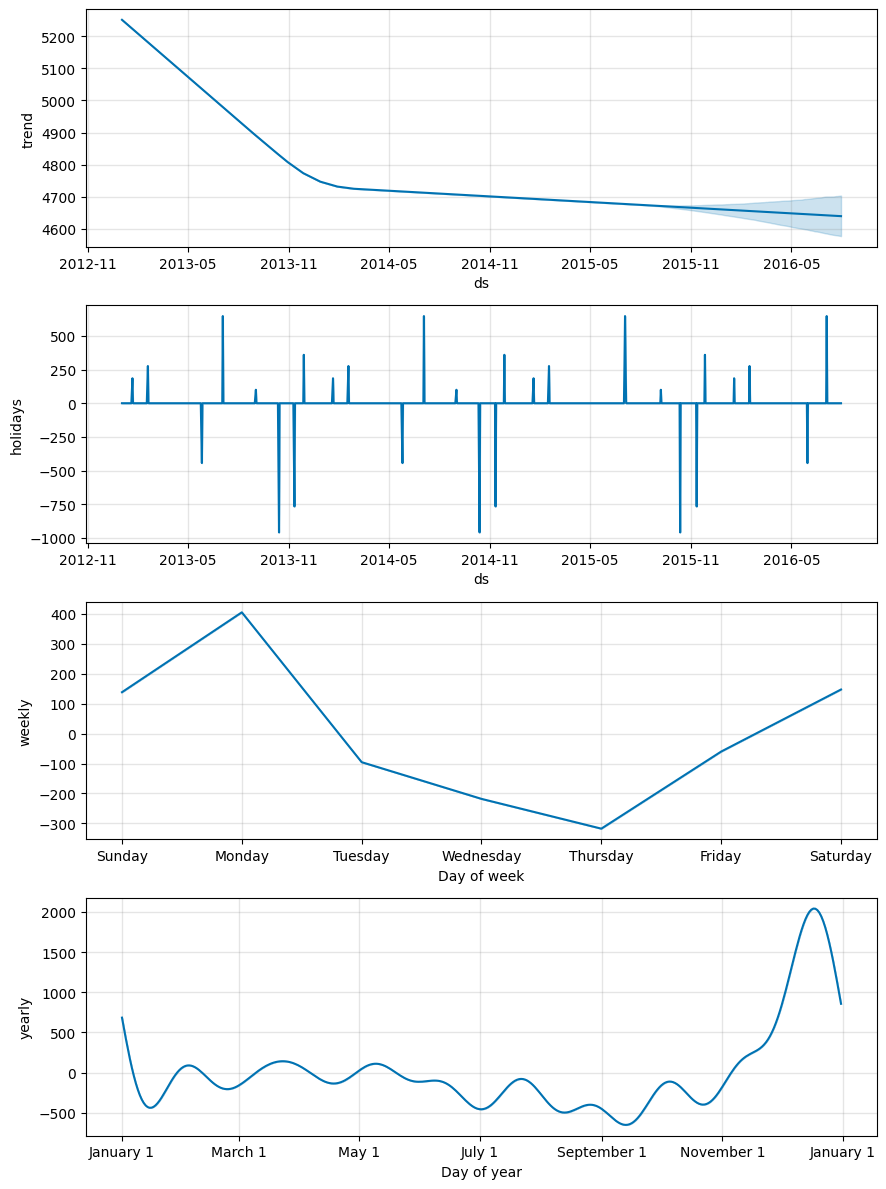

In [71]:
m3.plot_components(forecast3);

Add Regressors

In [72]:
set(store1['StateHoliday'])

{'0', 'a', 'b', 'c'}

In [73]:
set(store1['SchoolHoliday'])

{0, 1}

In [74]:
df_p['open'] = store1['Open']
df_p['promo'] = store1['Promo']
df_p[['SH1', 'SH2', 'SH3']] = pd.get_dummies(
    store1['StateHoliday'], drop_first=True)
df_p['SchoolHoliday'] = store1['SchoolHoliday']

In [75]:
df_p.head(20)

,y,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
Date,,,,,,,,
2013-01-01,0,2013-01-01,0,0,1,0,0,1
2013-01-02,5530,2013-01-02,1,0,0,0,0,1
2013-01-03,4327,2013-01-03,1,0,0,0,0,1
2013-01-04,4486,2013-01-04,1,0,0,0,0,1
2013-01-05,4997,2013-01-05,1,0,0,0,0,1
2013-01-06,0,2013-01-06,0,0,0,0,0,1
2013-01-07,7176,2013-01-07,1,1,0,0,0,1
2013-01-08,5580,2013-01-08,1,1,0,0,0,1
2013-01-09,5471,2013-01-09,1,1,0,0,0,1


In [76]:
m4 = Prophet()
m4.add_regressor('open', mode = 'multiplicative')
m4.add_regressor('promo', mode='additive')
m4.add_regressor('SH1', mode='additive')
m4.add_regressor('SH2', mode='additive')
m4.add_regressor('SH3', mode='additive')
m4.add_regressor('SchoolHoliday', mode='additive')
m4.fit(df_p)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/kezizura.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/6kuf5b50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26006', 'data', 'file=/tmp/tmpqiswbw42/kezizura.json', 'init=/tmp/tmpqiswbw42/6kuf5b50.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_modeltuh1gfml/prophet_model-20230423052207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:22:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:22:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [77]:
future4 = m4.make_future_dataframe(periods=365)

In [78]:
train_idx = future4['ds'].isin(df_p.index)
test_idx = ~train_idx

In [80]:
regressors = ['open', 'promo', 'SH1', 'SH2', 'SH3', 'SchoolHoliday']
for r in regressors:
  future4.loc[train_idx, r] = df_p[r].to_list()

In [81]:
future4.loc[test_idx, 'open'] = \
  future4.loc[test_idx, 'ds'].apply(lambda x: 1.0 * (x.weekday() != 6))

for r in regressors[1:]:
  future4.loc[test_idx, r] = \
     df_p.iloc[-365:][r].to_list()

In [82]:
future4.tail(10)

,ds,open,promo,SH1,SH2,SH3,SchoolHoliday
1297,2016-07-21,1.0,0.0,0.0,0.0,0.0,0.0
1298,2016-07-22,1.0,0.0,0.0,0.0,0.0,0.0
1299,2016-07-23,1.0,0.0,0.0,0.0,0.0,0.0
1300,2016-07-24,0.0,0.0,0.0,0.0,0.0,0.0
1301,2016-07-25,1.0,0.0,0.0,0.0,0.0,0.0
1302,2016-07-26,1.0,1.0,0.0,0.0,0.0,1.0
1303,2016-07-27,1.0,1.0,0.0,0.0,0.0,1.0
1304,2016-07-28,1.0,1.0,0.0,0.0,0.0,1.0
1305,2016-07-29,1.0,1.0,0.0,0.0,0.0,1.0
1306,2016-07-30,1.0,1.0,0.0,0.0,0.0,1.0


In [83]:
forecast4 = m4.predict(future4)

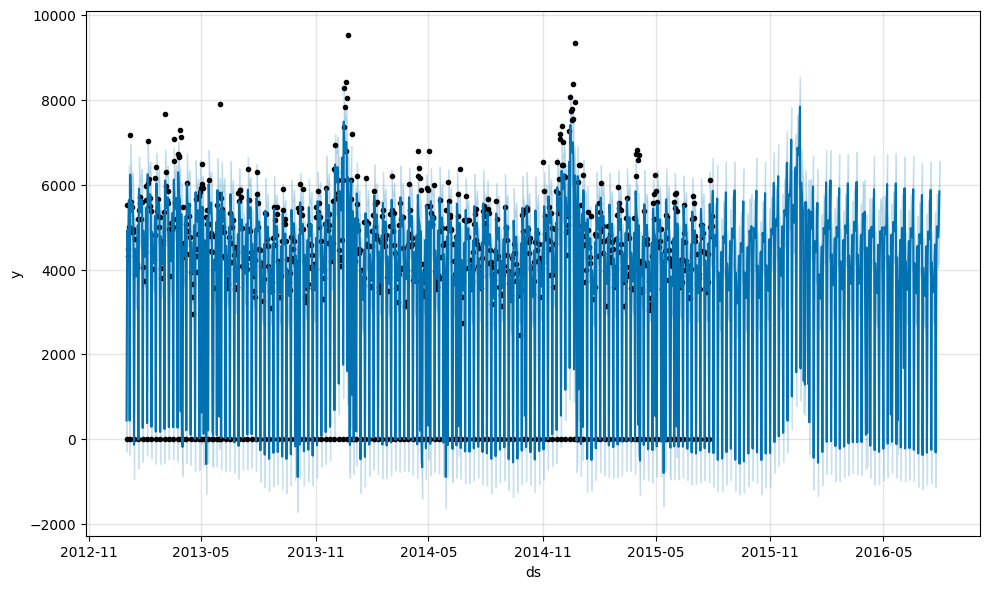

In [84]:
m4.plot(forecast4);

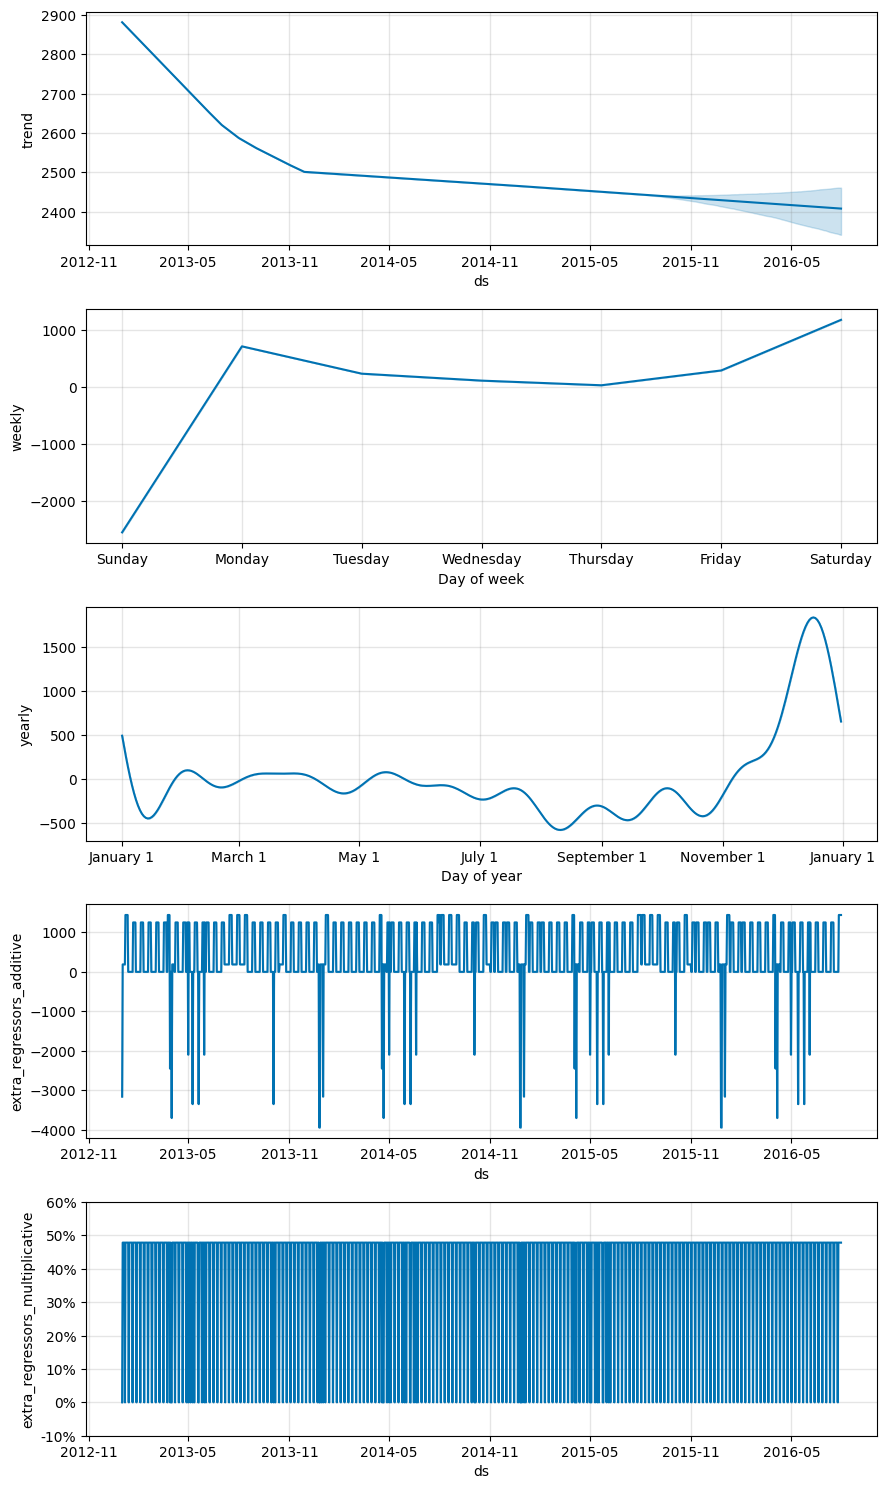

In [85]:
m4.plot_components(forecast4);

Cross-Validation

In [86]:
from prophet.diagnostics import cross_validation

In [87]:
df_cv = cross_validation(m,
                         initial='730 days',
                         period='30 days',
                         horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/mfjzgnxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/yq92kdrc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96942', 'data', 'file=/tmp/tmpqiswbw42/mfjzgnxc.json', 'init=/tmp/tmpqiswbw42/yq92kdrc.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_model1eibdqj4/prophet_model-20230423055505.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:55:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/7il29pzk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/_q1skpce.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [88]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-03,4608.289681,3176.659935,6070.814664,5023,2015-01-02
1,2015-01-04,-445.550548,-1900.899137,1064.126241,0,2015-01-02
2,2015-01-05,4571.201302,3124.021382,5915.394254,6239,2015-01-02
3,2015-01-06,4186.760885,2745.362316,5711.426544,4574,2015-01-02
4,2015-01-07,3949.021942,2416.636098,5399.983533,4796,2015-01-02
...,...,...,...,...,...,...
355,2015-07-27,4773.335144,3240.287994,6233.728975,6102,2015-06-01
356,2015-07-28,4448.661219,2965.745795,5850.557368,5011,2015-06-01
357,2015-07-29,4234.084441,2757.858864,5724.948330,4782,2015-06-01
358,2015-07-30,3858.515391,2420.680612,5324.094207,5020,2015-06-01


In [89]:
from prophet.diagnostics import performance_metrics

In [90]:
pm = performance_metrics(df_cv)
pm

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,6 days,2.222793e+06,1490.903436,920.421266,0.137957,0.550481,0.805556
1,7 days,1.587479e+06,1259.951824,759.027734,0.132260,0.491753,0.833333
2,8 days,1.460648e+06,1208.572593,705.468425,0.124084,0.486157,0.888889
3,9 days,1.167144e+06,1080.344591,690.078243,0.144806,0.453722,0.916667
4,10 days,5.060986e+05,711.406086,578.755228,0.153836,0.460164,0.944444
5,11 days,4.973497e+05,705.230258,569.664156,0.146121,0.403334,0.944444
6,12 days,8.566679e+05,925.563584,633.093741,0.146121,0.450098,0.944444
7,13 days,8.260868e+05,908.893157,604.759927,0.135763,0.441473,0.944444
8,14 days,7.819839e+05,884.298555,566.394472,0.123911,0.432889,0.944444
9,15 days,6.555906e+05,809.685502,498.259309,0.102864,0.414538,0.972222


In [91]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-03,4608.289681,3176.659935,6070.814664,5023,2015-01-02
1,2015-01-04,-445.550548,-1900.899137,1064.126241,0,2015-01-02
2,2015-01-05,4571.201302,3124.021382,5915.394254,6239,2015-01-02
3,2015-01-06,4186.760885,2745.362316,5711.426544,4574,2015-01-02
4,2015-01-07,3949.021942,2416.636098,5399.983533,4796,2015-01-02
...,...,...,...,...,...,...
355,2015-07-27,4773.335144,3240.287994,6233.728975,6102,2015-06-01
356,2015-07-28,4448.661219,2965.745795,5850.557368,5011,2015-06-01
357,2015-07-29,4234.084441,2757.858864,5724.948330,4782,2015-06-01
358,2015-07-30,3858.515391,2420.680612,5324.094207,5020,2015-06-01


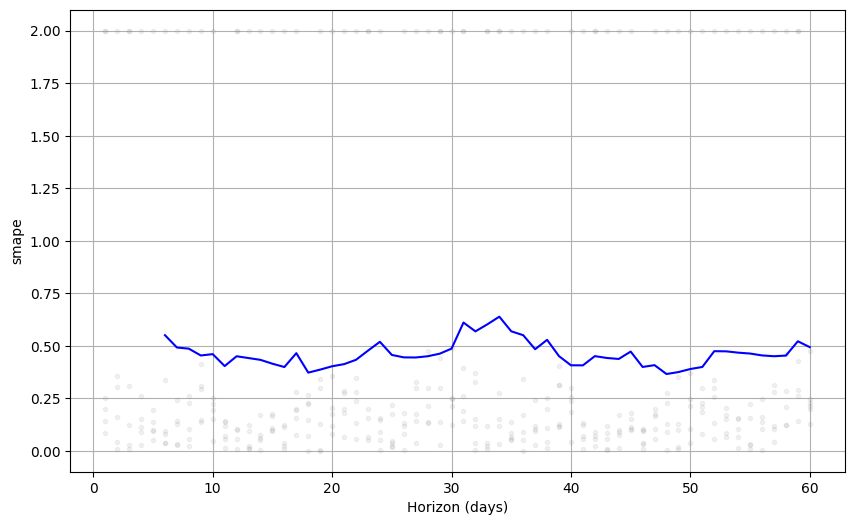

In [92]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [93]:
df_cv2 = cross_validation(
    m2,
    initial ='730 days',
    period='30 days',
    horizon='60 days'
)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/9hwcupyx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/z1inx4yu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85186', 'data', 'file=/tmp/tmpqiswbw42/9hwcupyx.json', 'init=/tmp/tmpqiswbw42/z1inx4yu.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_modelr9g3480g/prophet_model-20230423055921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:59:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:59:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/_j3ueu9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/vpfrjvkj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [94]:
pm3 = performance_metrics(df_cv2)

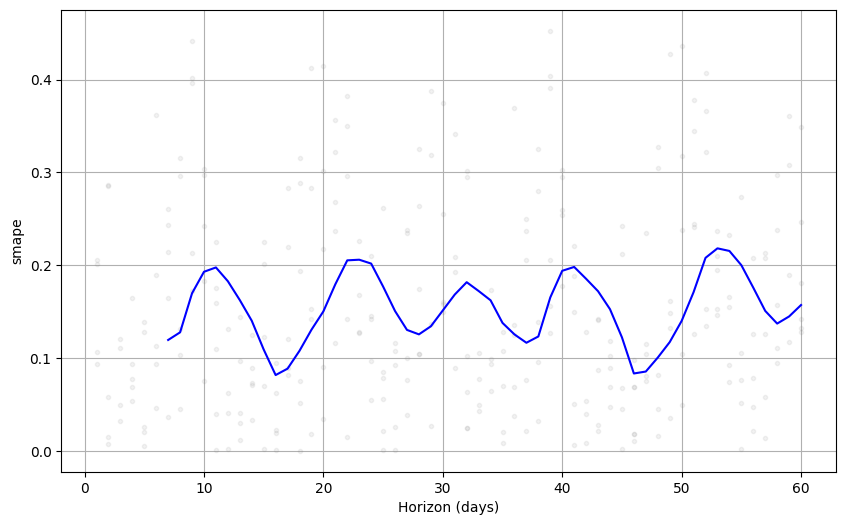

In [95]:
plot_cross_validation_metric(df_cv2, metric='smape');

In [96]:
df_cv3 = cross_validation(
    m3,
    initial='730 days',
    period = '30 days',
    horizon = '60 days')
pm3 = performance_metrics(df_cv3)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/xkzheqxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/8xoscqsb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38207', 'data', 'file=/tmp/tmpqiswbw42/xkzheqxy.json', 'init=/tmp/tmpqiswbw42/8xoscqsb.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_modelsna7hqrd/prophet_model-20230423060121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:01:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:01:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/tlf9jc_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/58lufrxc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

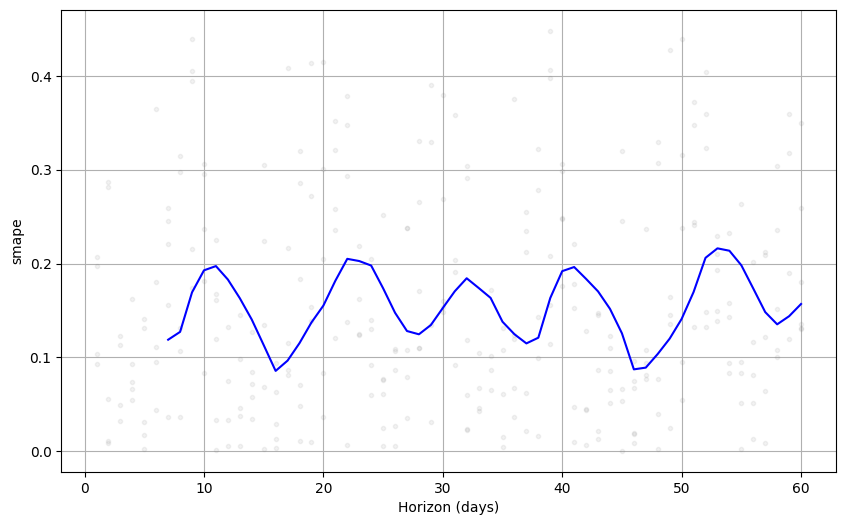

In [97]:
plot_cross_validation_metric(df_cv3, metric='smape');

In [98]:
df_cv4 = cross_validation(
    m4,
    initial='730 days',
    period = '30 days',
    horizon='60 days')
pm4 = performance_metrics(df_cv4)

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/bdi9bzpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/pr11ev41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37150', 'data', 'file=/tmp/tmpqiswbw42/bdi9bzpd.json', 'init=/tmp/tmpqiswbw42/pr11ev41.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_modelfvbo_0yx/prophet_model-20230423060314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:03:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:03:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/fair1cho.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/kopg9xhg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

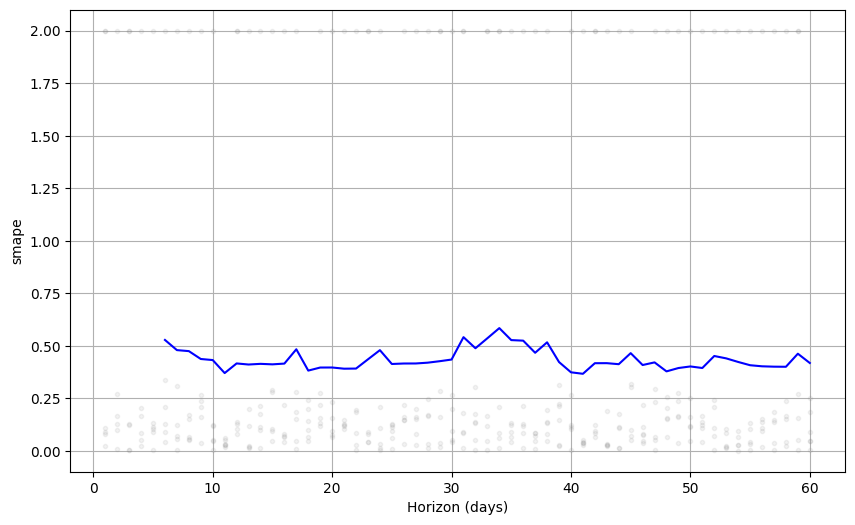

In [99]:
plot_cross_validation_metric(df_cv4, metric='smape');

In [102]:
pm['smape'].mean(), pm3['smape'].mean, pm3['smape'].mean(), pm4['smape'].mean()

(0.46176331861248626,
 <bound method NDFrame._add_numeric_operations.<locals>.mean of 0     0.118790
 1     0.127144
 2     0.169276
 3     0.192728
 4     0.197265
 5     0.182952
 6     0.163040
 7     0.140312
 8     0.113096
 9     0.085543
 10    0.096507
 11    0.115168
 12    0.137171
 13    0.155169
 14    0.181570
 15    0.204978
 16    0.202623
 17    0.197828
 18    0.173633
 19    0.147530
 20    0.128045
 21    0.124557
 22    0.134452
 23    0.152573
 24    0.170364
 25    0.184266
 26    0.173962
 27    0.163387
 28    0.137928
 29    0.124598
 30    0.114858
 31    0.120935
 32    0.163256
 33    0.191874
 34    0.196250
 35    0.183579
 36    0.170279
 37    0.151663
 38    0.125618
 39    0.087190
 40    0.089061
 41    0.103618
 42    0.119976
 43    0.140941
 44    0.169603
 45    0.206062
 46    0.216158
 47    0.213614
 48    0.198109
 49    0.173314
 50    0.148213
 51    0.135191
 52    0.143841
 53    0.156864
 Name: smape, dtype: float64>,
 0.15400968572573856

Changepoint Detection

In [104]:
from prophet.plot import add_changepoints_to_plot

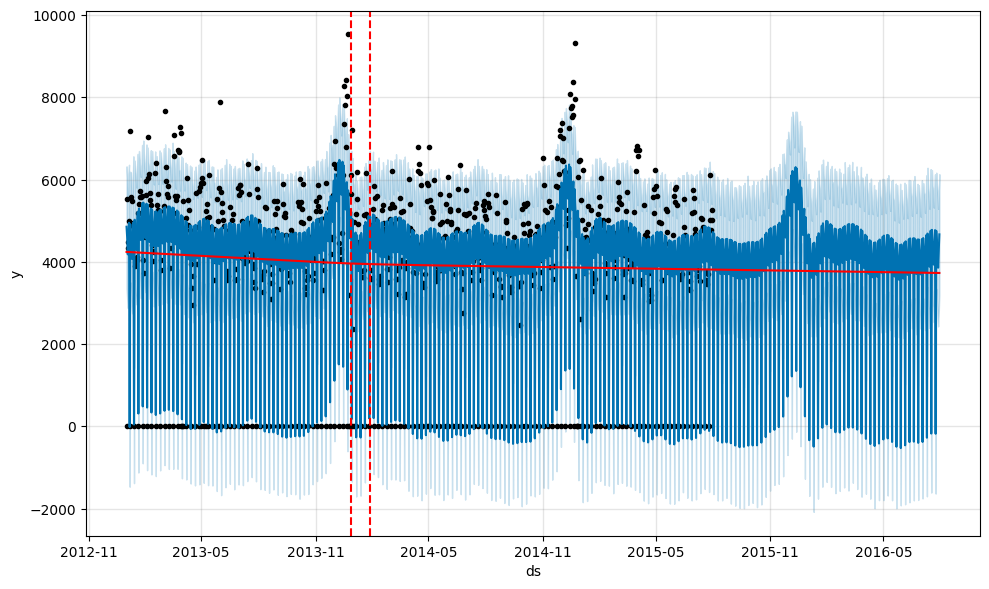

In [105]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

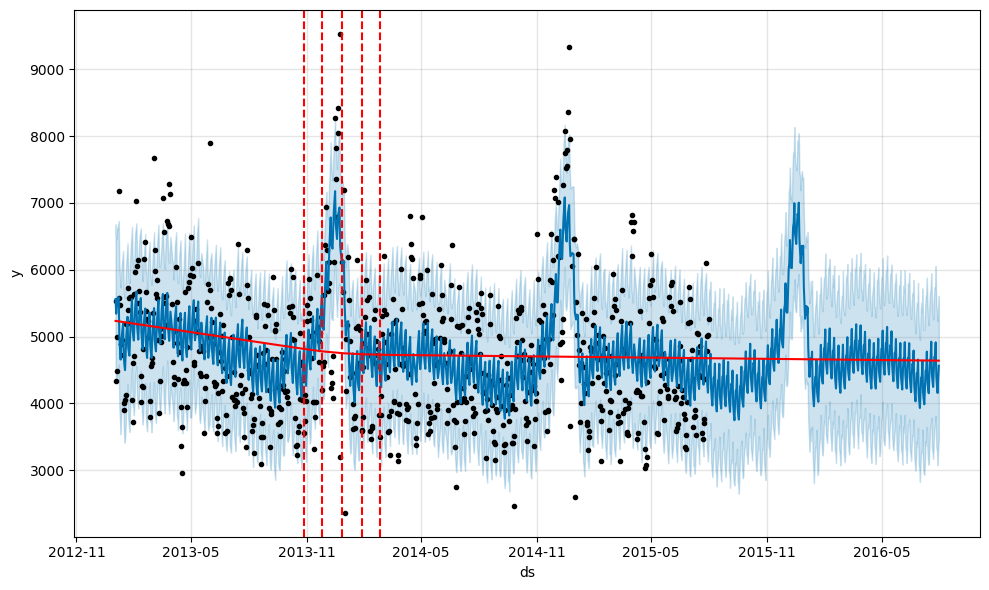

In [106]:
fig = m2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m2, forecast2)

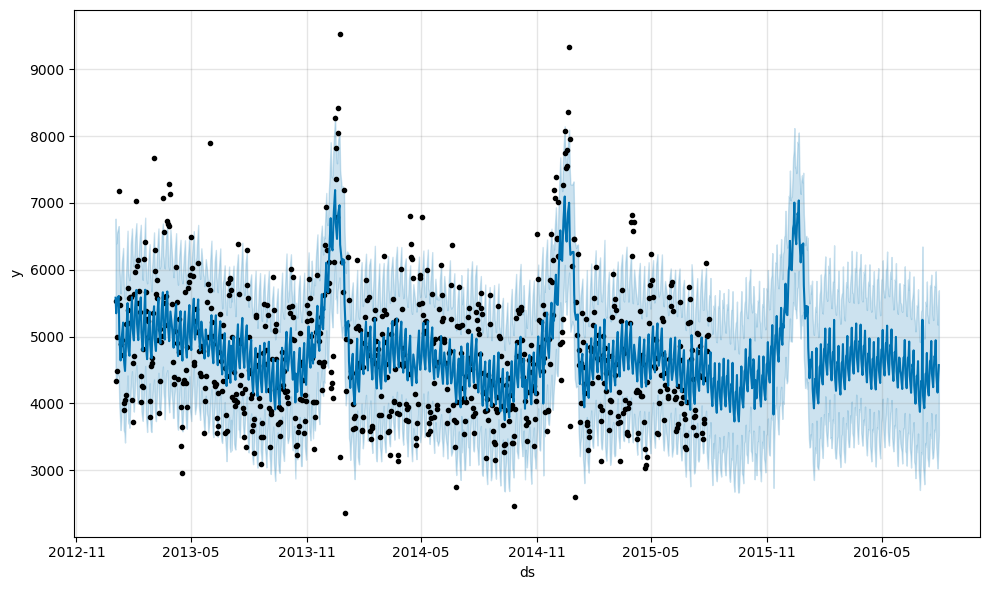

In [107]:
fig = m3.plot(forecast3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/3pg6vpt8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/63_b2hw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42159', 'data', 'file=/tmp/tmpqiswbw42/3pg6vpt8.json', 'init=/tmp/tmpqiswbw42/63_b2hw_.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_model9hu56na_/prophet_model-20230423061031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:10:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:10:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


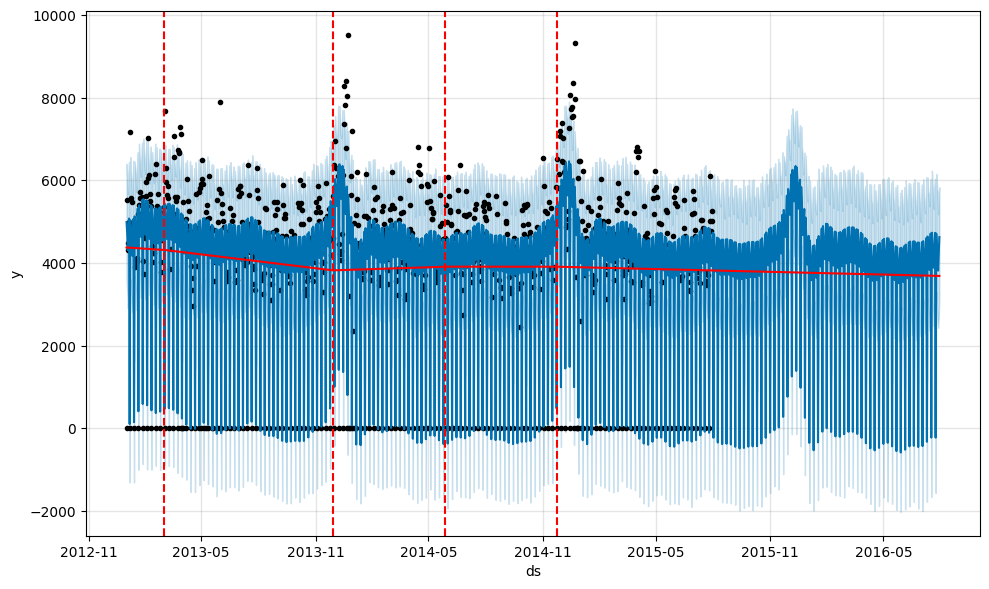

In [108]:
m_a = Prophet(changepoint_prior_scale=0.5)
forecast_a = m_a.fit(df_p).predict(future)
fig = m_a.plot(forecast_a)
a = add_changepoints_to_plot(fig.gca(), m_a, forecast_a)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/sg791eqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqiswbw42/plfj7da7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20322', 'data', 'file=/tmp/tmpqiswbw42/sg791eqn.json', 'init=/tmp/tmpqiswbw42/plfj7da7.json', 'output', 'file=/tmp/tmpqiswbw42/prophet_modelh8id1gr5/prophet_model-20230423061200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:12:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:12:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


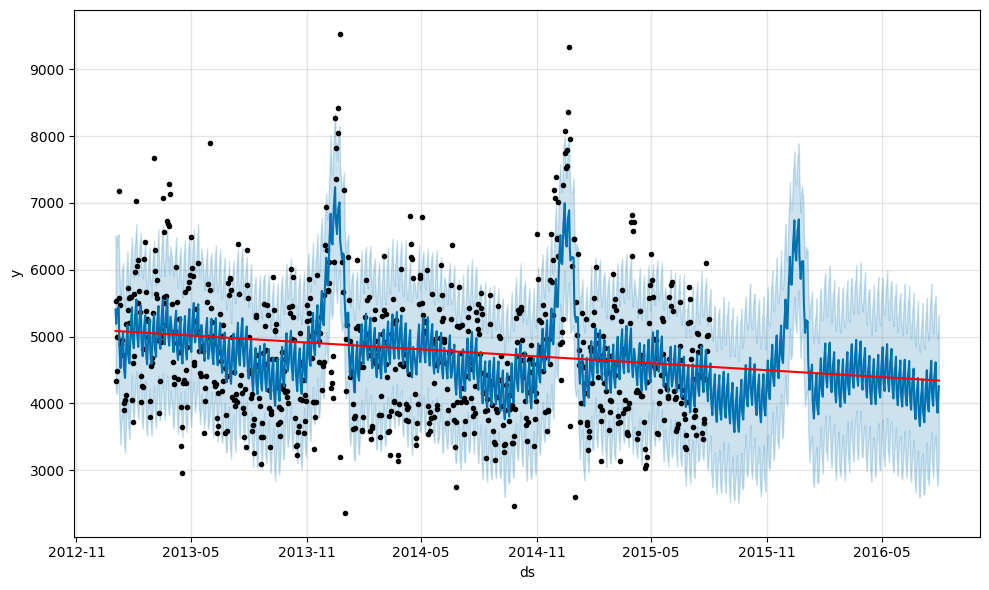

In [109]:
m2_a = Prophet(changepoint_prior_scale=0.005)
forecast2_a = m2_a.fit(df_p2).predict(future2)
fig = m2_a.plot(forecast2_a)
a = add_changepoints_to_plot(fig.gca(), m2_a, forecast2_a)